In [ ]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scipy.stats import kruskal
from imblearn.over_sampling import SMOTE

In [ ]:
file_path = '/content/data.csv'

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [ ]:
data.shape

(801, 20532)

In [ ]:
labels = pd.read_csv('/content/labels.csv')
labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [ ]:
# Agréger les données et la variable cible
data = pd.concat([data, labels], axis=1)
data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Unnamed: 0,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,sample_0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,sample_1,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,sample_2,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,sample_3,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,sample_4,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,sample_796,BRCA
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,sample_797,LUAD
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,sample_798,COAD
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,sample_799,PRAD


In [ ]:
data=data.dropna()

In [ ]:
# Identifier les colonnes en double
colonnes_en_double = data.columns[data.columns.duplicated()]

if colonnes_en_double.any():
    print("Colonnes en double détectées :")
    print(colonnes_en_double)

    # Supprimer la deuxième occurrence de la colonne en double
    data = data.loc[:, ~data.columns.duplicated()]

    print("\nColonnes après suppression des doublons :")
    print(data.columns)
else:
    print("Aucune colonne en double détectée.")

# Renommer la colonne "Unnamed: 0" en "sample"
data.rename(columns={'Unnamed: 0': 'sample'}, inplace=True)

data.shape

Colonnes en double détectées :
Index(['Unnamed: 0'], dtype='object')

Colonnes après suppression des doublons :
Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20533)


<ipython-input-96-6b78653a19f4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Unnamed: 0': 'sample'}, inplace=True)


(801, 20533)

# Data Preprocessing

# les données manquantes

In [ ]:
# Calculer la somme totale des valeurs nulles dans le DataFrame
somme_valeurs_nulles = data.isnull().sum().sum()

# Vérifier si le DataFrame a des valeurs nulles
if somme_valeurs_nulles > 0:
    print(f"Le DataFrame a {somme_valeurs_nulles} valeurs nulles au total.")
else:
    print("Le DataFrame n'a pas de valeurs nulles.")


Le DataFrame n'a pas de valeurs nulles.


# les doublons

In [ ]:
# Vérifier les doublons dans l'ensemble des données
doublons_globaux = data.duplicated(keep=False)

if doublons_globaux.any():
    print("Des doublons ont été détectés dans l'ensemble des données.")
    print(data[doublons_globaux])
else:
    print("Aucun doublon détecté dans l'ensemble des données.")


Aucun doublon détecté dans l'ensemble des données.


# Les outliers

utilisation de la méthode IQR pour détecter les outliers et afficher le pourcentage de valeurs aberrantes pour chaque colonne

In [ ]:
# Votre code pour calculer et afficher les colonnes avec des outliers basé sur les quartiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
outliers_pct = (outliers.sum() / data.shape[0]) * 100


outliers_dict = {col: outliers_pct[col] for col in outliers_pct[outliers_pct > 0].index}

# Convertir le dictionnaire en DataFrame pour une meilleure visualisation
outliers_df = pd.DataFrame(list(outliers_dict.items()), columns=['Colonne', 'Pourcentage Outliers'])

# Afficher le DataFrame
print("Colonnes avec outliers basé sur les quartiles :")
print(outliers_df)


<ipython-input-99-4e48baf2ec5a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-99-4e48baf2ec5a>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-99-4e48baf2ec5a>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


Colonnes avec outliers basé sur les quartiles :
          Colonne  Pourcentage Outliers
0          gene_0              4.369538
1         gene_10              6.117353
2        gene_100              1.872659
3       gene_1000              0.624220
4      gene_10000              0.124844
...           ...                   ...
18907   gene_9994              2.247191
18908   gene_9995              0.124844
18909   gene_9996             19.600499
18910   gene_9998             18.976280
18911   gene_9999              2.122347

[18912 rows x 2 columns]


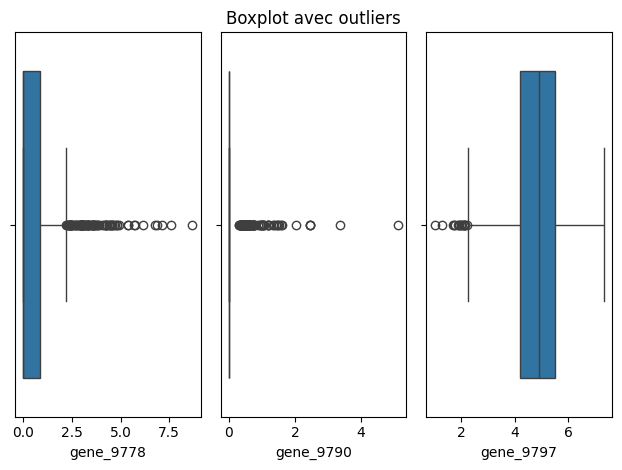

In [ ]:
columns = ['gene_9778', 'gene_9790', 'gene_9797']

# Configuration de la figure et des axes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes = axes.flatten()  # Convertit la matrice d'axes en un array plat pour une indexation facile

# Affichage des boxplots pour chaque colonne
for i, col in enumerate(columns):
    sns.boxplot(x=data[col], ax=axes[i])

axes[1].set_title(f'Boxplot avec outliers')
plt.tight_layout()
plt.show()

In [ ]:
seuil_outlier = 3  # Définir le seuil en pourcentage
colonnes_a_supprimer = []

for colonne in outliers_pct.index:
    if outliers_pct[colonne] > seuil_outlier:
        colonnes_a_supprimer.append(colonne)

# Supprimer les colonnes identifiées
data.drop(columns=colonnes_a_supprimer, inplace=True)

print(f"\n{len(colonnes_a_supprimer)} colonnes supprimées en raison d'un pourcentage d'outliers élevé.")


5084 colonnes supprimées en raison d'un pourcentage d'outliers élevé.


In [ ]:
data.shape

(801, 15449)

In [ ]:
# Identifier les colonnes avec uniquement des zéros
colonnes_zeros = data.columns[(data == 0).all()]
print("Colonnes avec uniquement des zéros :")
print(colonnes_zeros)

Colonnes avec uniquement des zéros :
Index(['gene_5', 'gene_23', 'gene_4370', 'gene_4808', 'gene_4809', 'gene_4814',
       'gene_4816', 'gene_4817', 'gene_4831', 'gene_5288',
       ...
       'gene_18908', 'gene_18909', 'gene_18910', 'gene_18911', 'gene_18914',
       'gene_18915', 'gene_19450', 'gene_19451', 'gene_19452', 'gene_19671'],
      dtype='object', length=267)


In [ ]:
# Supprimer les colonnes avec uniquement des zéros
data_sans_zeros = data.drop(columns=colonnes_zeros)
nombre_colonnes_supprimees = len(colonnes_zeros)
print(f"\n{nombre_colonnes_supprimees} colonnes ont été identifiées et supprimées car elles contenaient uniquement des zéros.")


267 colonnes ont été identifiées et supprimées car elles contenaient uniquement des zéros.


In [ ]:
data_sans_zeros.shape  # après la supp

(801, 15182)

In [ ]:
data=data_sans_zeros

# Analyse univariée (TARGET)

In [ ]:
# Vérifier la répartition des classes dans la variable cible
print(data['Class'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64


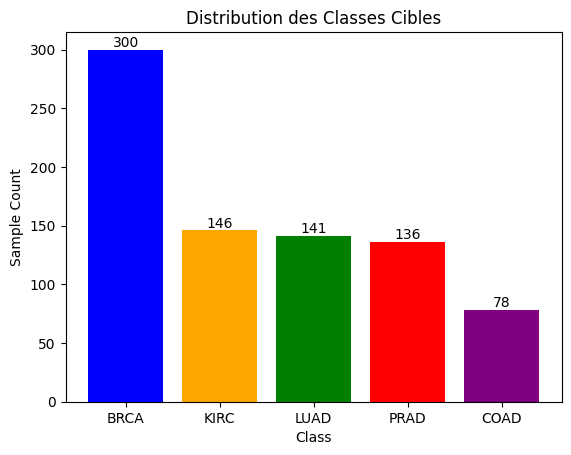

In [ ]:
class_counts = {'BRCA': 300, 'KIRC': 146, 'LUAD': 141, 'PRAD': 136, 'COAD': 78}
bars = plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.title('Distribution des Classes Cibles')
plt.xlabel('Class')
plt.ylabel('Sample Count')
plt.show()

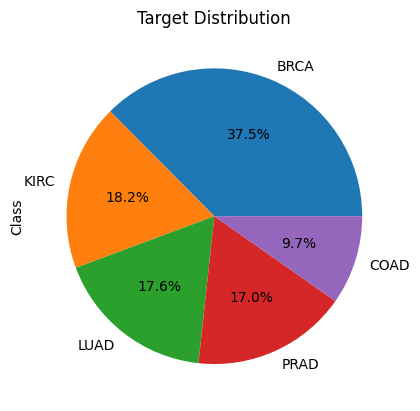

In [ ]:
data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()


# encodage de la cible

In [ ]:
label_encoder = LabelEncoder()

data['target'] = label_encoder.fit_transform(data['Class'])

# Afficher le DataFrame avec la nouvelle colonne 'Category_encoded'
print(data[['target', 'Class']])


     target Class
0         4  PRAD
1         3  LUAD
2         4  PRAD
3         4  PRAD
4         0  BRCA
..      ...   ...
796       0  BRCA
797       3  LUAD
798       1  COAD
799       4  PRAD
800       4  PRAD

[801 rows x 2 columns]


In [ ]:
# Afficher la correspondance entre les catégories originales et les entiers attribués
print("Correspondance catégories originales et entiers attribués:")
for original_category, encoded_category in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_category}: {encoded_category}")


Correspondance catégories originales et entiers attribués:
BRCA: 0
COAD: 1
KIRC: 2
LUAD: 3
PRAD: 4


In [ ]:
# Supprimer la colonne 'Category'
del data['Class']
data

,sample,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_11,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,target
0,sample_0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,1.334282,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,4
1,sample_1,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.587845,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,3
2,sample_2,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,4
3,sample_3,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,4
4,sample_4,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,1.275841,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,1.865642,2.718197,7.350099,10.006003,6.764792,0.496922,0.0,0.0,0.000000,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0
797,sample_797,3.942955,4.453807,6.346597,10.056868,7.320331,0.000000,0.0,0.0,1.049282,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,3
798,sample_798,3.249582,3.707492,8.185901,9.504082,7.536589,1.811101,0.0,0.0,4.049317,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,1
799,sample_799,2.590339,2.787976,7.318624,9.987136,9.213464,0.000000,0.0,0.0,1.800703,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,4


# Feature selection
**Test Statistique**

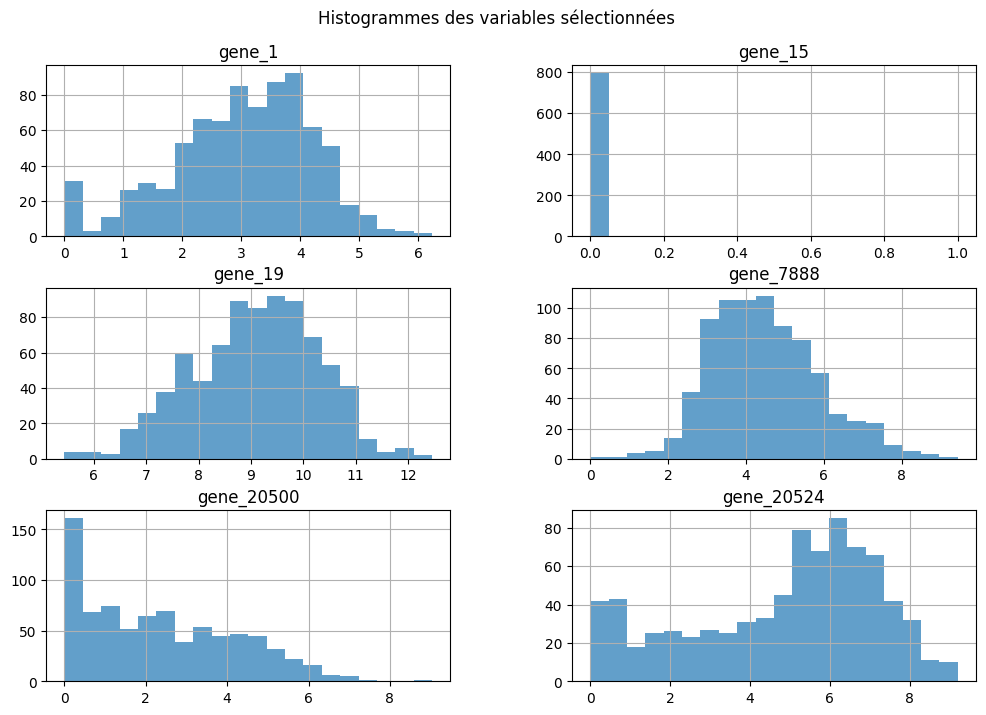

In [ ]:
# Sélectionnez les colonnes que vous souhaitez visualiser
columns_to_plot = ['gene_1', 'gene_15', 'gene_19','gene_7888'	,'gene_20500'	,'gene_20524'		]


# Créez un DataFrame avec les colonnes sélectionnées
subset_data = data[columns_to_plot]

# Créez des histogrammes
subset_data.hist(figsize=(12, 8), bins=20, alpha=0.7)
plt.suptitle('Histogrammes des variables sélectionnées', y=0.95)
plt.show()


In [ ]:
data1 = data.drop('sample', axis=1)

In [ ]:
# Définir le seuil de signification
seuil_signification = 0.05

# Parcourir les colonnes du DataFrame
for column in data1.columns:
    # Utilisez les catégories réelles de la variable cible
    groups = [data1[column][data1['target'] == category] for category in data1['target'].unique()]

    _, p_value = kruskal(*groups)

In [ ]:
variables_non_significatives = []

for column in data1.columns:
    # Utilisez les catégories réelles de la variable cible
    groups = [data1[column][data1['target'] == category] for category in data1['target'].unique()]

    _, p_value = kruskal(*groups)

    if p_value >= seuil_signification:
        variables_non_significatives.append(column)

# Afficher les variables non significatives
print("Variables non significatives :", variables_non_significatives)

Variables non significatives : ['gene_8', 'gene_9', 'gene_16', 'gene_21', 'gene_287', 'gene_607', 'gene_1076', 'gene_1077', 'gene_1118', 'gene_1288', 'gene_1469', 'gene_1578', 'gene_1624', 'gene_1628', 'gene_1749', 'gene_1765', 'gene_1888', 'gene_1983', 'gene_2251', 'gene_2272', 'gene_2320', 'gene_2322', 'gene_2334', 'gene_2481', 'gene_2482', 'gene_2509', 'gene_2703', 'gene_2722', 'gene_2789', 'gene_2852', 'gene_3266', 'gene_3525', 'gene_3527', 'gene_3735', 'gene_3840', 'gene_4282', 'gene_4283', 'gene_4310', 'gene_4312', 'gene_4318', 'gene_4333', 'gene_4352', 'gene_4371', 'gene_4372', 'gene_4374', 'gene_4375', 'gene_4376', 'gene_4518', 'gene_4807', 'gene_4810', 'gene_4811', 'gene_4815', 'gene_4818', 'gene_4819', 'gene_4820', 'gene_4822', 'gene_4823', 'gene_4824', 'gene_4826', 'gene_4828', 'gene_4829', 'gene_4835', 'gene_4836', 'gene_5828', 'gene_6024', 'gene_6051', 'gene_6061', 'gene_6075', 'gene_6150', 'gene_6191', 'gene_6446', 'gene_6486', 'gene_6508', 'gene_6523', 'gene_6804', 'gene

In [ ]:
# Supprimez les variables non significatives de votre ensemble de données
data1 = data1.drop(variables_non_significatives, axis=1)

In [ ]:
data1.shape

(801, 14805)

In [ ]:
# Séparer les variables indépendantes (X) et la variable cible (y)
X = data1.drop('target', axis=1)
y = data1['target']

# matrice de corrélation

In [ ]:
# Calculer la matrice de corrélation
matrice_correlation = data.corr()

# Afficher la matrice de corrélation
print(matrice_correlation)

<ipython-input-123-7a2e7f3a323e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlation = data.corr()


              gene_1    gene_2    gene_3    gene_4    gene_6    gene_7  \
gene_1      1.000000  0.533902  0.148348 -0.158555  0.202855  0.177154   
gene_2      0.533902  1.000000  0.075988 -0.125376  0.334900  0.136246   
gene_3      0.148348  0.075988  1.000000  0.153666 -0.007905 -0.084841   
gene_4     -0.158555 -0.125376  0.153666  1.000000 -0.044347 -0.156698   
gene_6      0.202855  0.334900 -0.007905 -0.044347  1.000000  0.299892   
...              ...       ...       ...       ...       ...       ...   
gene_20526 -0.255093 -0.160446  0.092787  0.011739  0.034257 -0.087913   
gene_20527  0.303771  0.163181 -0.000379 -0.434604  0.106230  0.159428   
gene_20528  0.247959  0.066709  0.016733 -0.108036 -0.135111  0.083252   
gene_20529 -0.067474  0.011765 -0.135829 -0.007229  0.039222 -0.010877   
target      0.159998  0.346244 -0.125999 -0.233125  0.030793 -0.047536   

              gene_8    gene_9   gene_11   gene_12  ...  gene_20521  \
gene_1      0.023411  0.006425  0.104157

# Data Split

In [ ]:
# Division des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 # Equilibrage du data

l equilibrage des données drto b SMOTE hya la methode li ktkhdm mzzyn f bhl hd es données shof chatgpt i3tik shi justif hitsh ana mwlfa knkhdm biha o3rftha mzyana o9arya 3liha dkchy bch knkhd biha nishan

In [ ]:
# Équilibrage des classes sur l'ensemble d'entraînement avec SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Avant SMOTE - X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("Après SMOTE - X_train_balanced shape:", X_train_balanced.shape, "y_train_balanced shape:", y_train_balanced.shape)

Avant SMOTE - X_train shape: (640, 14804) y_train shape: (640,)
Après SMOTE - X_train_balanced shape: (1200, 14804) y_train_balanced shape: (1200,)


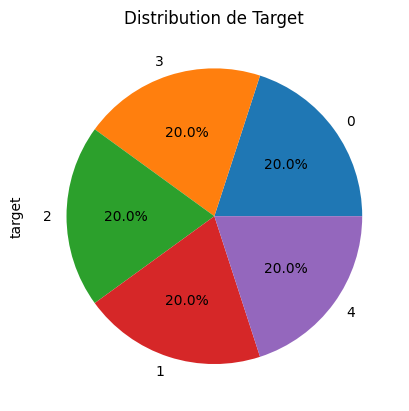

In [ ]:
y_train_balanced.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution de Target')
plt.show()

hna rndir l modele 3la les données 9bl ob3d l equilibrage bsh tshof shno hsn owsh kyna amélioration

# Data Normalization

In [ ]:
#  Normalisez les données d'entraînement
scaler = StandardScaler()
X_train_normalized1 = scaler.fit_transform(X_train)

#  Appliquez la même normalisation aux données de test
X_test_normalized1 = scaler.transform(X_test)

In [ ]:
#  Normalisez les données d'entraînement
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized = scaler.transform(X_test)

#SVM

In [ ]:
# Créer un modèle SVM
svm_model = SVC(probability=True)

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_normalized1, y_train)

# Prédiction avec validation croisée
y_pred_svm = cross_val_predict(svm_model, X_train_normalized1, y_train, cv=5)

# Créer et afficher la matrice de confusion
conf_matrix_svm = confusion_matrix(y_train, y_pred_svm)
print("Matrice de confusion pour SVM :\n", conf_matrix_svm)

# Calculer et afficher les autres métriques
accuracy_svm = accuracy_score(y_train, y_pred_svm)
print("\nPrécision pour SVM : {:.2f}".format(accuracy_svm))

# Rapport de classification
class_report_svm = classification_report(y_train, y_pred_svm)
print("\nRapport de classification pour SVM :\n", class_report_svm)

Matrice de confusion pour SVM :
 [[240   0   0   0   0]
 [  0  61   0   1   0]
 [  3   0 113   0   0]
 [  1   0   0 112   0]
 [  2   0   0   0 107]]

Précision pour SVM : 0.99

Rapport de classification pour SVM :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       240
           1       1.00      0.98      0.99        62
           2       1.00      0.97      0.99       116
           3       0.99      0.99      0.99       113
           4       1.00      0.98      0.99       109

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



In [ ]:
# Prédiction sur l'ensemble de test
y_test_pred = svm_model.predict(X_test_normalized1)

# Matrice de confusion sur l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Affichage de la matrice de confusion et des métriques d'évaluation
print("Matrice de Confusion sur l'ensemble de test :")
print(conf_matrix_test)

print("\nAutres Métriques d'Évaluation :")
print("Précision : {:.2f}".format(accuracy))
print("Précision (pondérée) : {:.2f}".format(precision))
print("Rappel (pondéré) : {:.2f}".format(recall))
print("F1-score (pondéré) : {:.2f}".format(f1))

# Rapport de Classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de Classification :")
print(class_report)

Matrice de Confusion sur l'ensemble de test :
[[60  0  0  0  0]
 [ 1 15  0  0  0]
 [ 0  0 30  0  0]
 [ 2  0  0 26  0]
 [ 0  0  0  0 27]]

Autres Métriques d'Évaluation :
Précision : 0.98
Précision (pondérée) : 0.98
Rappel (pondéré) : 0.98
F1-score (pondéré) : 0.98

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        30
           3       1.00      0.93      0.96        28
           4       1.00      1.00      1.00        27

    accuracy                           0.98       161
   macro avg       0.99      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161



# modele xgboost (les  données  sans equilibrage)

In [ ]:
# Définir les paramètres du modèle

params = {
    'objective': 'multi:softmax',
    'num_class': len(set(y)),
    'eval_metric': 'mlogloss'
}

# Créer un modèle XGBoost
model = xgb.XGBClassifier(**params)

# Entraîner le modèle sur l'ensemble d'entraînement complet
eval_set = [(X_train_normalized1, y_train), (X_test_normalized1, y_test)]
model.fit(X_train_normalized1, y_train, eval_set=eval_set, verbose=True)

# Prédiction avec validation croisée!!!!
y_pred = cross_val_predict(model, X_train_normalized1, y_train, cv=5)

# Créer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred)
# Afficher la table de contingence
print(conf_matrix_train)

[0]	validation_0-mlogloss:0.96629	validation_1-mlogloss:1.00893
[1]	validation_0-mlogloss:0.65992	validation_1-mlogloss:0.71786
[2]	validation_0-mlogloss:0.46833	validation_1-mlogloss:0.53795
[3]	validation_0-mlogloss:0.33891	validation_1-mlogloss:0.41002
[4]	validation_0-mlogloss:0.24798	validation_1-mlogloss:0.31550
[5]	validation_0-mlogloss:0.18330	validation_1-mlogloss:0.24847
[6]	validation_0-mlogloss:0.13628	validation_1-mlogloss:0.19941
[7]	validation_0-mlogloss:0.10203	validation_1-mlogloss:0.16487
[8]	validation_0-mlogloss:0.07695	validation_1-mlogloss:0.13388
[9]	validation_0-mlogloss:0.05840	validation_1-mlogloss:0.11480
[10]	validation_0-mlogloss:0.04473	validation_1-mlogloss:0.09819
[11]	validation_0-mlogloss:0.03453	validation_1-mlogloss:0.08509
[12]	validation_0-mlogloss:0.02694	validation_1-mlogloss:0.07622
[13]	validation_0-mlogloss:0.02129	validation_1-mlogloss:0.06939
[14]	validation_0-mlogloss:0.01701	validation_1-mlogloss:0.06086
[15]	validation_0-mlogloss:0.01374	

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')
print("\nAutres Métriques d'Évaluation :")
print("Précision : {:.2f}".format(accuracy))
print("Précision (pondérée) : {:.2f}".format(precision))
print("Rappel (pondéré) : {:.2f}".format(recall))
print("F1-score (pondéré) : {:.2f}".format(f1))
# Rapport de Classification
class_report = classification_report(y_train, y_pred)
print("\nRapport de Classification :")
print(class_report)


Autres Métriques d'Évaluation :
Précision : 0.99
Précision (pondérée) : 0.99
Rappel (pondéré) : 0.99
F1-score (pondéré) : 0.99

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       240
           1       1.00      1.00      1.00        62
           2       0.99      0.99      0.99       116
           3       1.00      0.97      0.99       113
           4       1.00      0.99      1.00       109

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



In [ ]:
# Prédiction sur l'ensemble de test
y_test_pred = model.predict(X_test_normalized1)

# Matrice de confusion sur l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Affichage de la matrice de confusion et des métriques d'évaluation
print("Matrice de Confusion sur l'ensemble de test :")
print(conf_matrix_test)

print("\nAutres Métriques d'Évaluation :")
print("Précision : {:.2f}".format(accuracy))
print("Précision (pondérée) : {:.2f}".format(precision))
print("Rappel (pondéré) : {:.2f}".format(recall))
print("F1-score (pondéré) : {:.2f}".format(f1))

# Rapport de Classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de Classification :")
print(class_report)


Matrice de Confusion sur l'ensemble de test :
[[60  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 30  0  0]
 [ 2  0  0 26  0]
 [ 0  0  0  0 27]]

Autres Métriques d'Évaluation :
Précision : 0.99
Précision (pondérée) : 0.99
Rappel (pondéré) : 0.99
F1-score (pondéré) : 0.99

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      0.93      0.96        28
           4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



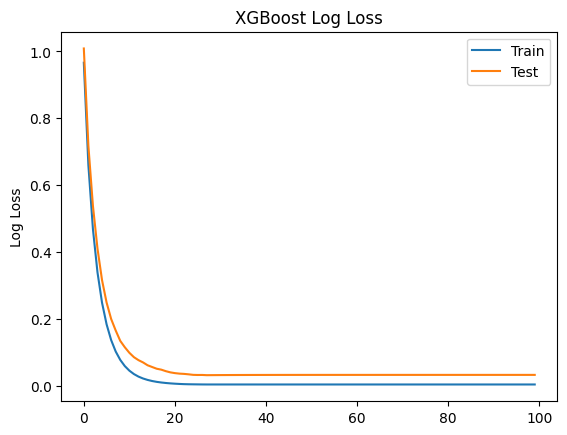

In [ ]:
# Extraction des scores de perte
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Courbe de perte pour l'ensemble d'entraînement
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')

# Courbe de perte pour l'ensemble de test
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# ANN

In [ ]:
# Ensure y_train is a 1D array
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_train = np.ravel(y_train)

y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test = np.ravel(y_test)

# One-hot encode labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Normalize training and testing data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the parameters of the model
n_classes = len(set(y_train))
input_shape = X_train.shape[1]

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Create the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_normalized, y_train_encoded, epochs=10, batch_size=32, class_weight=class_weights_dict)

# Evaluate the model on the training set
y_train_pred_prob = model.predict(X_train_normalized)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train_encoded)
print(f"Accuracy on the training set: {train_accuracy:.2f}")

# Additional metrics
train_precision = precision_score(np.argmax(y_train_encoded, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train_encoded, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train_encoded, axis=1), y_train_pred, average='weighted')

print(f"Precision on the training set: {train_precision:.2f}")
print(f"Recall on the training set: {train_recall:.2f}")
print(f"F1 score on the training set: {train_f1:.2f}")


# Create confusion matrix and classification report for training set
conf_matrix_train = confusion_matrix(np.argmax(y_train_encoded, axis=1), y_train_pred)
print("Confusion matrix on the training set:")
print(conf_matrix_train)

class_names_train = encoder.get_feature_names_out(input_features=['target'])
report_train = classification_report(np.argmax(y_train_encoded, axis=1), y_train_pred, target_names=class_names_train)
print("Classification report on the training set:")
print(report_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
20/20 [==============================] - 1s 23ms/step - loss: 0.1896 - accuracy: 0.9344
Epoch 2/10
20/20 [==============================] - 1s 26ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 3/10
20/20 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 0s 19ms/step - loss: 8.1881e-06 - accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 0s 19ms/step - loss: 7.6448e-06 - accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 0s 19ms/step - loss: 2.2098e-06 - accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 0s 20ms/step - loss: 1.7197e-06 - accuracy: 1.0000
Epoch 8/10
20/20 [==============================] - 0s 20ms/step - loss: 1.3901e-06 - accuracy: 1.0000
Epoch 9/10
20/20 [==============================] - 0s 20ms/step - loss: 1.2292e-06 - accuracy: 1.0000
Epoch 10/10
20/20 [==============================] - 0s 4ms/step - loss: 1.8925e-06 -

In [ ]:
# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_normalized)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, to_categorical(y_test))
print(f"Accuracy on the test set: {test_accuracy:.2f}")

# Additional metrics
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision on the test set: {test_precision:.2f}")
print(f"Recall on the test set: {test_recall:.2f}")
print(f"F1 score on the test set: {test_f1:.2f}")

# Create confusion matrix and classification report for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix on the test set:")
print(conf_matrix_test)

class_names_test = encoder.get_feature_names_out(input_features=['target'])
report_test = classification_report(y_test, y_test_pred, target_names=class_names_test)
print("Classification report on the test set:")
print(report_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9938
Accuracy on the test set: 0.99
Precision on the test set: 0.99
Recall on the test set: 0.99
F1 score on the test set: 0.99
Confusion matrix on the test set:
[[60  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 30  0  0]
 [ 0  1  0 27  0]
 [ 0  0  0  0 27]]
Classification report on the test set:
              precision    recall  f1-score   support

    target_0       1.00      1.00      1.00        60
    target_1       0.94      1.00      0.97        16
    target_2       1.00      1.00      1.00        30
    target_3       1.00      0.96      0.98        28
    target_4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



# modeles avec equilibrage

#SVM Equi

In [ ]:
# Créer un modèle SVM
svm_model = SVC(probability=True)

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_normalized, y_train_balanced)

# Prédiction avec validation croisée
y_pred_svm = cross_val_predict(svm_model, X_train_normalized, y_train_balanced, cv=5)

# Créer et afficher la matrice de confusion
conf_matrix_svm = confusion_matrix(y_train_balanced, y_pred_svm)
print("Matrice de confusion pour SVM :\n", conf_matrix_svm)

# Calculer et afficher les autres métriques
accuracy_svm = accuracy_score(y_train_balanced, y_pred_svm)
print("\nPrécision pour SVM : {:.2f}".format(accuracy_svm))

# Rapport de classification
class_report_svm = classification_report(y_train_balanced, y_pred_svm)
print("\nRapport de classification pour SVM :\n", class_report_svm)

Matrice de confusion pour SVM :
 [[240   0   0   0   0]
 [  0 240   0   0   0]
 [  1   0 239   0   0]
 [  1   0   0 239   0]
 [  1   0   0   0 239]]

Précision pour SVM : 1.00

Rapport de classification pour SVM :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       240
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       240

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [ ]:
# Prédiction sur l'ensemble de test
y_test_pred = svm_model.predict(X_test_normalized)

# Matrice de confusion sur l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Affichage de la matrice de confusion et des métriques d'évaluation
print("Matrice de Confusion sur l'ensemble de test :")
print(conf_matrix_test)

print("\nAutres Métriques d'Évaluation :")
print("Précision : {:.2f}".format(accuracy))
print("Précision (pondérée) : {:.2f}".format(precision))
print("Rappel (pondéré) : {:.2f}".format(recall))
print("F1-score (pondéré) : {:.2f}".format(f1))

# Rapport de Classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de Classification :")
print(class_report)

Matrice de Confusion sur l'ensemble de test :
[[60  0  0  0  0]
 [ 1 15  0  0  0]
 [ 0  0 30  0  0]
 [ 2  0  0 26  0]
 [ 0  0  0  0 27]]

Autres Métriques d'Évaluation :
Précision : 0.98
Précision (pondérée) : 0.98
Rappel (pondéré) : 0.98
F1-score (pondéré) : 0.98

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        30
           3       1.00      0.93      0.96        28
           4       1.00      1.00      1.00        27

    accuracy                           0.98       161
   macro avg       0.99      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161



## ANN (equi)

In [ ]:


# Assume X_train_balanced, X_test, y_train_balanced, y_test are your input data

# Ensure y_train_balanced is a 1D array
y_train_balanced = y_train_balanced.values if isinstance(y_train_balanced, pd.Series) else y_train_balanced
y_train_balanced = np.ravel(y_train_balanced)

y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test = np.ravel(y_test)

# One-hot encode labels
encoder = OneHotEncoder(sparse=False)
y_train_balanced_encoded = encoder.fit_transform(y_train_balanced.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Normalize training and testing data
scaler = StandardScaler()
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized = scaler.transform(X_test)

# Define the parameters of the model
n_classes = len(set(y_train_balanced))
input_shape = X_train_balanced.shape[1]

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
class_weights_dict = dict(enumerate(class_weights))

# Create the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced_normalized, y_train_balanced_encoded, epochs=10, batch_size=32, class_weight=class_weights_dict)


# Evaluate the model on the training set
y_train_pred_prob = model.predict(X_train_balanced_normalized)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_balanced_normalized, y_train_balanced_encoded)
print(f"Accuracy on the training set: {train_accuracy:.2f}")

# Additional metrics
train_precision = precision_score(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, average='weighted')

print(f"Precision on the training set: {train_precision:.2f}")
print(f"Recall on the training set: {train_recall:.2f}")
print(f"F1 score on the training set: {train_f1:.2f}")


# Create confusion matrix and classification report for training set
conf_matrix_train = confusion_matrix(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred)
print("Confusion matrix on the training set:")
print(conf_matrix_train)

class_names_train = encoder.get_feature_names_out(input_features=['target'])
report_train = classification_report(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, target_names=class_names_train)
print("Classification report on the training set:")
print(report_train)





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
38/38 [==============================] - 1s 13ms/step - loss: 0.1592 - accuracy: 0.9667
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0017 - accuracy: 0.9992
Epoch 3/10
38/38 [==============================] - 1s 19ms/step - loss: 2.3603e-04 - accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 1s 18ms/step - loss: 7.3186e-06 - accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 1s 18ms/step - loss: 5.0452e-07 - accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 1s 19ms/step - loss: 3.9874e-07 - accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 1s 17ms/step - loss: 3.4937e-07 - accuracy: 1.0000
Epoch 8/10
38/38 [==============================] - 1s 13ms/step - loss: 3.0328e-07 - accuracy: 1.0000
Epoch 9/10
38/38 [==============================] - 1s 13ms/step - loss: 2.7884e-07 - accuracy: 1.0000
Epoch 10/10
38/38 [==============================] - 0s 4ms/step - loss: 2.3335e-

In [ ]:


# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_normalized)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, to_categorical(y_test_pred))
print(f"Accuracy on the test set: {test_accuracy:.2f}")

# Additional metrics
test_precision = precision_score(np.argmax(y_test_encoded, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test_encoded, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test_encoded, axis=1), y_test_pred, average='weighted')

print(f"Precision on the test set: {test_precision:.2f}")
print(f"Recall on the test set: {test_recall:.2f}")
print(f"F1 score on the test set: {test_f1:.2f}")

# Create confusion matrix and classification report for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix on the test set:")
print(conf_matrix_test)

class_names_test = encoder.get_feature_names_out(input_features=['target'])
report_test = classification_report(y_test, y_test_pred, target_names=class_names_test)
print("Classification report on the test set:")
print(report_test)


6/6 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000
Accuracy on the test set: 1.00
Precision on the test set: 0.99
Recall on the test set: 0.99
F1 score on the test set: 0.99
Confusion matrix on the test set:
[[60  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 30  0  0]
 [ 1  0  0 27  0]
 [ 0  0  0  0 27]]
Classification report on the test set:
              precision    recall  f1-score   support

    target_0       0.98      1.00      0.99        60
    target_1       1.00      1.00      1.00        16
    target_2       1.00      1.00      1.00        30
    target_3       1.00      0.96      0.98        28
    target_4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



# xgboost ( equilibrage )

In [ ]:
# Normalisez les données d'entraînement
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_balanced)

# Appliquer la même normalisation aux données de test
X_test_normalized = scaler.transform(X_test)

# Définir les paramètres du modèle
params = {
    'objective': 'multi:softmax',
    'num_class': len(set(y)),
    'eval_metric': 'mlogloss'
}

# Créer un modèle XGBoost
model = xgb.XGBClassifier(**params)

eval_set = [(X_train_normalized, y_train_balanced), (X_test_normalized, y_test)]
model.fit(X_train_normalized, y_train_balanced, eval_set=eval_set, verbose=True)


# Prédiction sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train_normalized)




[0]	validation_0-mlogloss:0.95831	validation_1-mlogloss:0.98287
[1]	validation_0-mlogloss:0.65268	validation_1-mlogloss:0.69671
[2]	validation_0-mlogloss:0.46164	validation_1-mlogloss:0.52221
[3]	validation_0-mlogloss:0.33262	validation_1-mlogloss:0.39630
[4]	validation_0-mlogloss:0.24251	validation_1-mlogloss:0.30832
[5]	validation_0-mlogloss:0.17824	validation_1-mlogloss:0.24737
[6]	validation_0-mlogloss:0.13171	validation_1-mlogloss:0.19641
[7]	validation_0-mlogloss:0.09789	validation_1-mlogloss:0.16406
[8]	validation_0-mlogloss:0.07311	validation_1-mlogloss:0.13684
[9]	validation_0-mlogloss:0.05485	validation_1-mlogloss:0.11720
[10]	validation_0-mlogloss:0.04142	validation_1-mlogloss:0.10175
[11]	validation_0-mlogloss:0.03145	validation_1-mlogloss:0.09044
[12]	validation_0-mlogloss:0.02409	validation_1-mlogloss:0.08269
[13]	validation_0-mlogloss:0.01860	validation_1-mlogloss:0.07244
[14]	validation_0-mlogloss:0.01450	validation_1-mlogloss:0.06791
[15]	validation_0-mlogloss:0.01143	

In [ ]:
# Matrice de confusion sur l'ensemble d'entraînement
conf_matrix_train = confusion_matrix(y_train_balanced, y_train_pred)

# Autres métriques d'évaluation pour l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train_balanced, y_train_pred)
precision_train = precision_score(y_train_balanced, y_train_pred, average='weighted')
recall_train = recall_score(y_train_balanced, y_train_pred, average='weighted')
f1_train = f1_score(y_train_balanced, y_train_pred, average='weighted')

# Affichage des résultats pour l'ensemble d'entraînement
print("\nMatrice de Confusion sur l'ensemble d'entraînement :")
print(conf_matrix_train)

print("\nMétriques d'Évaluation pour l'ensemble d'entraînement :")
print("Précision : {:.2f}".format(accuracy_train))
print("Précision (pondérée) : {:.2f}".format(precision_train))
print("Rappel (pondéré) : {:.2f}".format(recall_train))
print("F1-score (pondéré) : {:.2f}".format(f1_train))

# Rapport de Classification pour l'ensemble d'entraînement
class_report_train = classification_report(y_train_balanced, y_train_pred)
print("\nRapport de Classification pour l'ensemble d'entraînement :")
print(class_report_train)


Matrice de Confusion sur l'ensemble d'entraînement :
[[240   0   0   0   0]
 [  0 240   0   0   0]
 [  0   0 240   0   0]
 [  0   0   0 240   0]
 [  0   0   0   0 240]]

Métriques d'Évaluation pour l'ensemble d'entraînement :
Précision : 1.00
Précision (pondérée) : 1.00
Rappel (pondéré) : 1.00
F1-score (pondéré) : 1.00

Rapport de Classification pour l'ensemble d'entraînement :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       240

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [ ]:

# Prédiction sur l'ensemble de test
y_test_pred = model.predict(X_test_normalized)

# Matrice de confusion sur l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Affichage de la matrice de confusion et des métriques d'évaluation
print("Matrice de Confusion sur l'ensemble de test :")
print(conf_matrix_test)

print("\nAutres Métriques d'Évaluation :")
print("Précision : {:.2f}".format(accuracy))
print("Précision (pondérée) : {:.2f}".format(precision))
print("Rappel (pondéré) : {:.2f}".format(recall))
print("F1-score (pondéré) : {:.2f}".format(f1))

# Rapport de Classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de Classification :")
print(class_report)

Matrice de Confusion sur l'ensemble de test :
[[60  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 30  0  0]
 [ 2  0  0 26  0]
 [ 0  0  0  0 27]]

Autres Métriques d'Évaluation :
Précision : 0.99
Précision (pondérée) : 0.99
Rappel (pondéré) : 0.99
F1-score (pondéré) : 0.99

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      0.93      0.96        28
           4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



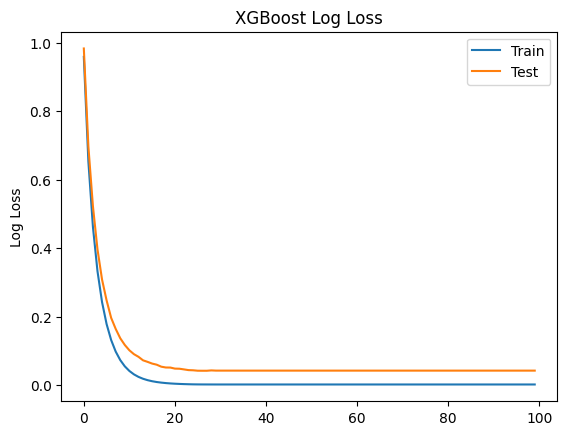

In [ ]:
# Extraction des scores de perte
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Courbe de perte pour l'ensemble d'entraînement
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')

# Courbe de perte pour l'ensemble de test
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# xgboost + equilibrage + umap

# UMAP

In [ ]:
!pip install umap-learn
from umap import UMAP



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2fde9047bd14857b7cb7f475f0e8816d7cca0b21fd4dbfde7b318843cfe5af0e
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from umap import UMAP
# Réduction de dimension avec UMAP
umap = UMAP(n_components=10)
X_train_umap = umap.fit_transform(X_train)
X_test_umap = umap.transform(X_test)



# equi

In [ ]:
# Équilibrage des classes sur l'ensemble d'entraînement avec SMOTE
smote = SMOTE(random_state=42)
X_train_balancedu, y_train_balancedu = smote.fit_resample(X_train_umap, y_train)


# SVM + equilibrage + UMAP

In [ ]:
# Créer un modèle SVM
svm_model = SVC(probability=True)

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_balancedu, y_train_balancedu)

# Prédiction avec validation croisée
y_pred_svm = cross_val_predict(svm_model, X_train_balancedu, y_train_balancedu, cv=5)

# Créer et afficher la matrice de confusion
conf_matrix_svm = confusion_matrix(y_train_balancedu, y_pred_svm)
print("Matrice de confusion pour SVM :\n", conf_matrix_svm)

# Calculer et afficher les autres métriques
accuracy_svm = accuracy_score(y_train_balancedu, y_pred_svm)
print("\nPrécision pour SVM : {:.2f}".format(accuracy_svm))

# Rapport de classification
class_report_svm = classification_report(y_train_balancedu, y_pred_svm)
print("\nRapport de classification pour SVM :\n", class_report_svm)

Matrice de confusion pour SVM :
 [[240   0   0   0   0]
 [  0 240   0   0   0]
 [  0   0 240   0   0]
 [  0   0   0 240   0]
 [  0   0   0   0 240]]

Précision pour SVM : 1.00

Rapport de classification pour SVM :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       240

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [ ]:
# Prédiction sur l'ensemble de test
y_test_pred = svm_model.predict(X_test_umap)

# Matrice de confusion sur l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Affichage de la matrice de confusion et des métriques d'évaluation
print("Matrice de Confusion sur l'ensemble de test :")
print(conf_matrix_test)

print("\nAutres Métriques d'Évaluation :")
print("Précision : {:.2f}".format(accuracy))
print("Précision (pondérée) : {:.2f}".format(precision))
print("Rappel (pondéré) : {:.2f}".format(recall))
print("F1-score (pondéré) : {:.2f}".format(f1))

# Rapport de Classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de Classification :")
print(class_report)

Matrice de Confusion sur l'ensemble de test :
[[60  0  0  0  0]
 [ 0 15  0  1  0]
 [ 0  0 30  0  0]
 [ 1  0  0 27  0]
 [ 0  0  0  0 27]]

Autres Métriques d'Évaluation :
Précision : 0.99
Précision (pondérée) : 0.99
Rappel (pondéré) : 0.99
F1-score (pondéré) : 0.99

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        30
           3       0.96      0.96      0.96        28
           4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.98      0.98       161
weighted avg       0.99      0.99      0.99       161



XGboost

In [ ]:

# Normalisez les données d'entraînement
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_balanced)

# Appliquer la même normalisation aux données de test
X_test_normalized = scaler.transform(X_test_umap)

# Définir les paramètres du modèle
params = {
    'objective': 'multi:softmax',
    'num_class': len(set(y)),
    'eval_metric': 'mlogloss'
}

# Créer un modèle XGBoost
model = xgb.XGBClassifier(**params)

# Entraîner le modèle sur l'ensemble d'entraînement complet
eval_set = [(X_train_normalized, y_train_balanced), (X_test_normalized, y_test)]
model.fit(X_train_normalized, y_train_balanced, eval_set=eval_set, verbose=True)

# Prédiction sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train_normalized)




[0]	validation_0-mlogloss:0.94932	validation_1-mlogloss:0.96584
[1]	validation_0-mlogloss:0.64446	validation_1-mlogloss:0.66889
[2]	validation_0-mlogloss:0.45486	validation_1-mlogloss:0.48439
[3]	validation_0-mlogloss:0.32721	validation_1-mlogloss:0.36032
[4]	validation_0-mlogloss:0.23793	validation_1-mlogloss:0.27447
[5]	validation_0-mlogloss:0.17428	validation_1-mlogloss:0.21399
[6]	validation_0-mlogloss:0.12835	validation_1-mlogloss:0.17070
[7]	validation_0-mlogloss:0.09494	validation_1-mlogloss:0.14012
[8]	validation_0-mlogloss:0.07051	validation_1-mlogloss:0.11721
[9]	validation_0-mlogloss:0.05258	validation_1-mlogloss:0.10002
[10]	validation_0-mlogloss:0.03937	validation_1-mlogloss:0.08776
[11]	validation_0-mlogloss:0.02962	validation_1-mlogloss:0.07797
[12]	validation_0-mlogloss:0.02241	validation_1-mlogloss:0.07248
[13]	validation_0-mlogloss:0.01707	validation_1-mlogloss:0.06704
[14]	validation_0-mlogloss:0.01310	validation_1-mlogloss:0.06448
[15]	validation_0-mlogloss:0.01014	

In [ ]:
# Matrice de confusion sur l'ensemble d'entraînement
conf_matrix_train = confusion_matrix(y_train_balanced, y_train_pred)

# Autres métriques d'évaluation pour l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train_balanced, y_train_pred)
precision_train = precision_score(y_train_balanced, y_train_pred, average='weighted')
recall_train = recall_score(y_train_balanced, y_train_pred, average='weighted')
f1_train = f1_score(y_train_balanced, y_train_pred, average='weighted')

# Affichage des résultats pour l'ensemble d'entraînement
print("\nMatrice de Confusion sur l'ensemble d'entraînement :")
print(conf_matrix_train)

print("\nMétriques d'Évaluation pour l'ensemble d'entraînement :")
print("Précision : {:.2f}".format(accuracy_train))
print("Précision (pondérée) : {:.2f}".format(precision_train))
print("Rappel (pondéré) : {:.2f}".format(recall_train))
print("F1-score (pondéré) : {:.2f}".format(f1_train))

# Rapport de Classification pour l'ensemble d'entraînement
class_report_train = classification_report(y_train_balanced, y_train_pred)
print("\nRapport de Classification pour l'ensemble d'entraînement :")
print(class_report_train)


Matrice de Confusion sur l'ensemble d'entraînement :
[[240   0   0   0   0]
 [  0 240   0   0   0]
 [  0   0 240   0   0]
 [  0   0   0 240   0]
 [  0   0   0   0 240]]

Métriques d'Évaluation pour l'ensemble d'entraînement :
Précision : 1.00
Précision (pondérée) : 1.00
Rappel (pondéré) : 1.00
F1-score (pondéré) : 1.00

Rapport de Classification pour l'ensemble d'entraînement :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       240

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [ ]:

# Prédiction sur l'ensemble de test
y_test_pred = model.predict(X_test_normalized)

# Matrice de confusion sur l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Autres métriques d'évaluation
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Affichage de la matrice de confusion et des métriques d'évaluation
print("Matrice de Confusion sur l'ensemble de test :")
print(conf_matrix_test)

print("\nAutres Métriques d'Évaluation :")
print("Précision : {:.2f}".format(accuracy))
print("Précision (pondérée) : {:.2f}".format(precision))
print("Rappel (pondéré) : {:.2f}".format(recall))
print("F1-score (pondéré) : {:.2f}".format(f1))

# Rapport de Classification
class_report = classification_report(y_test, y_test_pred)
print("\nRapport de Classification :")
print(class_report)

Matrice de Confusion sur l'ensemble de test :
[[60  0  0  0  0]
 [ 0 15  0  0  1]
 [ 0  0 30  0  0]
 [ 1  0  0 26  1]
 [ 1  0  0  0 26]]

Autres Métriques d'Évaluation :
Précision : 0.98
Précision (pondérée) : 0.98
Rappel (pondéré) : 0.98
F1-score (pondéré) : 0.98

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        30
           3       1.00      0.93      0.96        28
           4       0.93      0.96      0.95        27

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.97       161
weighted avg       0.98      0.98      0.98       161



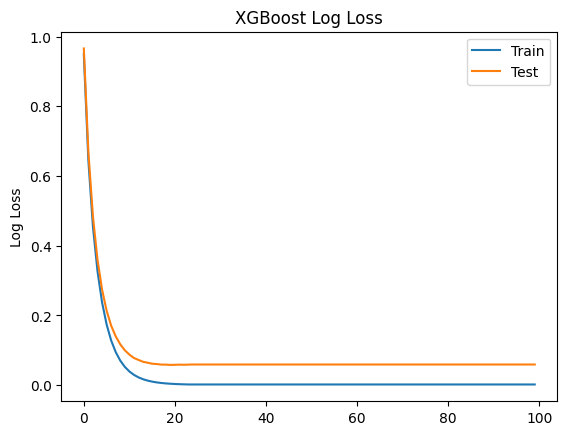

In [ ]:
# Extraction des scores de perte
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Courbe de perte pour l'ensemble d'entraînement
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')

# Courbe de perte pour l'ensemble de test
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# ANN + equilibrage + umap

In [ ]:
# Ensure y_train_balanced is a 1D array
y_train_balanced = y_train_balanced.values if isinstance(y_train_balanced, pd.Series) else y_train_balanced
y_train_balanced = np.ravel(y_train_balanced)

y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
y_test = np.ravel(y_test)

# One-hot encode labels
encoder = OneHotEncoder(sparse=False)
y_train_balanced_encoded = encoder.fit_transform(y_train_balanced.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Normalize training and testing data
scaler = StandardScaler()
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized = scaler.transform(X_test_umap)

# Define the parameters of the model
n_classes = len(set(y_train_balanced))
input_shape = X_train_balanced.shape[1]

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_balanced), y=y_train_balanced)
class_weights_dict = dict(enumerate(class_weights))

# Create the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced_normalized, y_train_balanced_encoded, epochs=10, batch_size=32, class_weight=class_weights_dict)


# Evaluate the model on the training set
y_train_pred_prob = model.predict(X_train_balanced_normalized)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_balanced_normalized, y_train_balanced_encoded)
print(f"Accuracy on the training set: {train_accuracy:.2f}")

# Additional metrics
train_precision = precision_score(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, average='weighted')

print(f"Precision on the training set: {train_precision:.2f}")
print(f"Recall on the training set: {train_recall:.2f}")
print(f"F1 score on the training set: {train_f1:.2f}")


# Create confusion matrix and classification report for training set
conf_matrix_train = confusion_matrix(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred)
print("Confusion matrix on the training set:")
print(conf_matrix_train)

class_names_train = encoder.get_feature_names_out(input_features=['target'])
report_train = classification_report(np.argmax(y_train_balanced_encoded, axis=1), y_train_pred, target_names=class_names_train)
print("Classification report on the training set:")
print(report_train)





Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


38/38 [==============================] - 1s 2ms/step - loss: 1.2657 - accuracy: 0.5883
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 10/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 1.0000
Accuracy on the training set: 

In [ ]:
# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_normalized)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, to_categorical(y_test_pred))
print(f"Accuracy on the test set: {test_accuracy:.2f}")

# Additional metrics
test_precision = precision_score(np.argmax(y_test_encoded, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test_encoded, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test_encoded, axis=1), y_test_pred, average='weighted')

print(f"Precision on the test set: {test_precision:.2f}")
print(f"Recall on the test set: {test_recall:.2f}")
print(f"F1 score on the test set: {test_f1:.2f}")

# Create confusion matrix and classification report for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix on the test set:")
print(conf_matrix_test)

class_names_test = encoder.get_feature_names_out(input_features=['target'])
report_test = classification_report(y_test, y_test_pred, target_names=class_names_test)
print("Classification report on the test set:")
print(report_test)


6/6 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 1.0000
Accuracy on the test set: 1.00
Precision on the test set: 0.99
Recall on the test set: 0.99
F1 score on the test set: 0.99
Confusion matrix on the test set:
[[60  0  0  0  0]
 [ 0 15  0  1  0]
 [ 0  0 30  0  0]
 [ 1  0  0 27  0]
 [ 0  0  0  0 27]]
Classification report on the test set:
              precision    recall  f1-score   support

    target_0       0.98      1.00      0.99        60
    target_1       1.00      0.94      0.97        16
    target_2       1.00      1.00      1.00        30
    target_3       0.96      0.96      0.96        28
    target_4       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.98      0.98       161
weighted avg       0.99      0.99      0.99       161

